----
Fórmula de Bayes 
----
Obtiene la Probabilidad a Posteriori P(wi|x) a partir de la densidad de probabilidad condicional p(x|wi), la probabilidad apriori P(wi) y la densidad de probabilidad incondicional de clase p(x).

P(wi|x)=p(x|wi) P(wi)/ p(x)


Regla de Decisión de Bayes: 

Asignar **x** a  la clase wi si 
P(wi|x)>P(wj|x)   para todo i diferente de j

o de manera equivalente:

Asignar **x** a  la clase wi si 

p(x|wi) P(wi)  > p(x|wj) P(wj)    para todo i diferente de j

EL valor de p(x) se cancela en la ecuación. Este sirve para normalizar la P(wi1x) entre 0 y 1


----

DENSIDAD DE PROBABILIDAD CONJUNTA p(wi,x)

Determina la probabilidad de que la clase sea wi y que el vector de características tenga el valor de x

Se puede calcular como el producto entre la densidad de probabilidad condicional y la probabilidad apriori:
p(wi,x)=p(x|wi) P(wi)


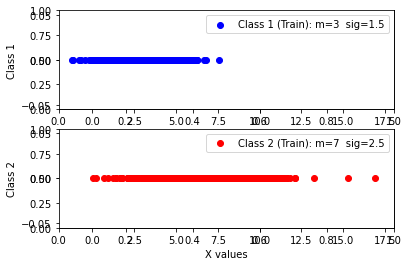

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

from sklearn.neighbors import KernelDensity

# Generación Data Set Sintético (2 Clases, 1 dimensión)

np.random.seed(1)
# Genera Datos Aleatorios Clase 1 m=3, sigm= 1.5
N1 = 400
m1=3
sigm1=1.5
X1=np.random.normal(m1, sigm1, N1)

# Genera Datos Aleatorios Clase 2: m=7, sigm= 2.5
N2 = 400
m2=7
sigm2=2.5
X2=np.random.normal(m2, sigm2, N2)

# Graficar puntos Class 1
fig, axs = plt.subplots(2,1)
axs=fig.add_subplot(2,1,1)
axs.scatter(X1,np.zeros(X1.size) ,marker = 'o', c='blue')
#plt.title("Data set - Class 1")
plt.xlim(-2,18)
axs.legend(['Class 1 (Train): '+ 'm='+ str(m1)+ '  sig='+ str(sigm1) ])
axs.set_xlabel('X values')
axs.set_ylabel('Class 1')

# Graficar puntos Class 2
axs=fig.add_subplot(2,1,2)
axs.scatter(X2,np.zeros(X2.size) ,marker = 'o', c='red')
#plt.title("Data set - Class 2")
plt.xlim(-2,18)
axs.legend(['Class 2 (Train): '+ 'm='+str(m2)+ '  sig='+ str(sigm2) ])
axs.set_xlabel('X values')
axs.set_ylabel('Class 2')
   
   
plt.show()

Densidad de Probabilidad Condicional de Clase (a partir de histogramas)
----

p(x|w)=hist/(delta*N)

La función plt.hist() lo realiza usando el parámetro: density=True

Nota 1: La forma del histograma y de la p(x|w) es la misma. Solo cambian las amplitudes.

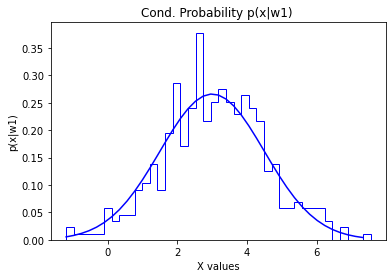

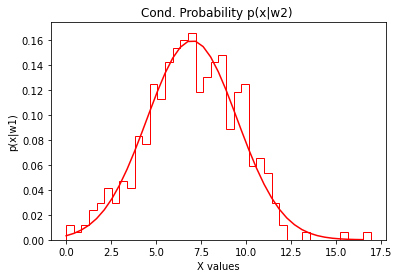

In [2]:
# p(x|w1)

Nbin1=int(N1/10)
min_X1=np.min(X1)
max_X1=np.max(X1)
delta1=(max_X1-min_X1)/Nbin1

px_w1= plt.hist(X1, bins=Nbin1, density=True,color='blue', histtype='step' ) 
plt.title("Cond. Probability p(x|w1) ")
plt.xlabel('X values')
plt.ylabel('p(x|w1)')

# Plot a normal distribution
ejeX1=np.arange(min_X1, max_X1,delta1)
plt.plot(ejeX1,norm.pdf(ejeX1,m1,sigm1),color='blue')

plt.show()

# p(x|w2)
Nbin2=int(N2/10)
min_X2=np.min(X2)
max_X2=np.max(X2)
delta2=(max_X2-min_X2)/Nbin2

px_w2= plt.hist(X2, bins=Nbin2 ,density=True,color='red', histtype='step' ) 
plt.title("Cond. Probability p(x|w2) ")
plt.xlabel('X values')
plt.ylabel('p(x|w1)')

# Plot a normal distribution
ejeX2=np.arange(min_X2, max_X2,delta2 )
plt.plot(ejeX2,norm.pdf(ejeX2,m2,sigm2),color='red')

plt.show()

Cálculo de la Probabilidad a Priori P(wi)
---

Se calcula con base en el tamaño del data set de una clase sobre el tamaño del data set de todas las clases

In [3]:
# Probabilidad a priori Class 1
Pw1=N1/(N1+N2)

# Probabilidad a priori Class 1
Pw2=N2/(N1+N2)


---
Densidad de Probabilidad Conjunta
---
p(wi,x)=p(x|wi) P(wi)

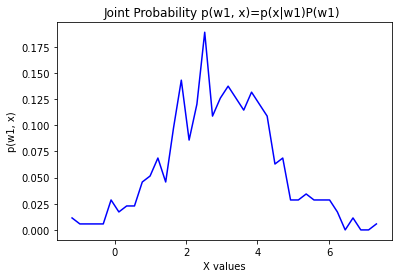

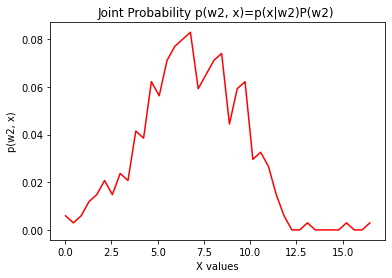

In [4]:
# Probabilidad Conjunta Classe 1
# p(w1,x)=p(x|w1) P(w1)

pw1_x=np.asarray(px_w1[0])*Pw1
#ejeX1=np.arange(min_X1, max_X1,delta1)
plt.plot(ejeX1,pw1_x, color='blue')
plt.title("Joint Probability p(w1, x)=p(x|w1)P(w1) ")
plt.xlabel('X values')
plt.ylabel('p(w1, x)')
plt.show()

# Probabilidad Conjunta Classe 2
# p(w2,x)=p(x|w2) P(w2)

pw2_x=np.asarray(px_w2[0])*Pw2
#ejeX2=np.arange(min_X2, max_X2,delta2)
plt.plot(ejeX2,pw2_x, color='red')
plt.title("Joint Probability p(w2, x)=p(x|w2)P(w2) ")
plt.xlabel('X values')
plt.ylabel('p(w2, x)')
plt.show()



----
Generación Data Set Test
--------


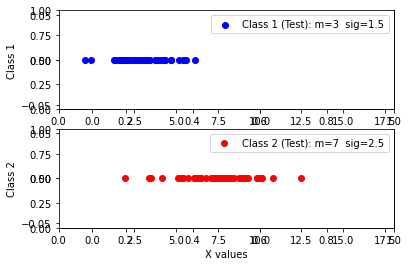

In [6]:
np.random.seed(1)
# Genera Datos Aleatorios Clase 1 m=3, sigm= 1.5
Nt1 = 50
#m1=3
#sigm1=1.5
Xt1=np.random.normal(m1, sigm1, Nt1)
yt1=np.ones(Nt1)  #Etiquetas clase 1

# Genera Datos Aleatorios Clase 2: m=7, sigm= 2.5
Nt2 = 50
#m2=7
#sigm2=2.5
Xt2=np.random.normal(m2, sigm2, Nt2)
yt2=2*np.ones(Nt2)  #Etiquetas clase 2

# Graficar data set Test  Class 1
fig, axs = plt.subplots(2,1)
axs=fig.add_subplot(2,1,1)
axs.scatter(Xt1,np.zeros(Xt1.size) ,marker = 'o', c='blue')
#plt.title("Data set - Class 1")
plt.xlim(-2,18)
axs.legend(['Class 1 (Test): '+ 'm='+ str(m1)+ '  sig='+ str(sigm1) ])
axs.set_xlabel('X values')
axs.set_ylabel('Class 1')

# Graficar data set -  Class 2
axs=fig.add_subplot(2,1,2)
axs.scatter(Xt2,np.zeros(Xt2.size) ,marker = 'o', c='red')
#plt.title("Data set - Class 2")
plt.xlim(-2,18)
axs.legend(['Class 2 (Test): '+ 'm='+str(m2)+ '  sig='+ str(sigm2) ])
axs.set_xlabel('X values')
axs.set_ylabel('Class 2')
   
   
plt.show()

----
Obtener p(wi,x) para los datos de prueba 
----


In [7]:
# A partir del valor de x del data set de test:
# i- Se verifica que el valor de x esté entre los valores máximos y mínimos del data set Train para cada clase
# ii- Se genera un índice para el bin de cada Densidad de Probabilidad Conjunta p(wi,x)=p(x|wi) P(wi)
# iii- Se recupera el valor de p(wi,x)=p(x|wi) P(wi) para cada clase


In [8]:
# Data set de Test
Xtest=np.concatenate((Xt1, Xt2))
ytest=np.concatenate((yt1, yt2))
# Almacenar los valores de A Posteriory Probability for class 1 and class 2
#APost=np.array((1,2), dtype=float)

ldt=len(Xtest) #Leng of test data set 
APost= np.zeros((ldt,3), dtype=float, order='C')  # Organización [apost_w1_  apost_w2  class_stim]
#display(APost)
print("Dim:", APost.ndim)
print("Shap:", APost.shape)
print("Size:", APost.size)

i=0;
for x in Xtest :
    
    # Obtener p(w1,x) (aproximación a P(w1|x))
    if x < min_X1 or x > max_X1  :
       apost_w1_x=0
    else:
        ind1= int(np.ceil((x-min_X1)/delta1)-1)
        apost_w1_x=pw1_x[ind1]

    # Obtener p(w2,x) (aproximación a P(w2|x))
    if x < min_X2 or x > max_X2  :
       apost_w2_x=0
    else:
        ind2= int(np.ceil((x-min_X2)/delta2)-1)
        apost_w2_x=pw2_x[ind2]
    #Almacenar datos
    APost[i,0]=apost_w1_x
    APost[i,1]=apost_w2_x
    i=i+1

#display(APost)
print("Dim:", APost.ndim)
print("Shap:", APost.shape)
print("Size:", APost.size)
#print("Solo Leng:", APost.shape[1,])
ojo= APost.shape
print("Dim ",ojo[0])

Dim: 2
Shap: (100, 3)
Size: 300
Dim: 2
Shap: (100, 3)
Size: 300
Dim  100


-----
Regla de Decisión de Bayes:
----

Asignar x a la clase wi si:

P(wi|x)>P(wj|x) para todo i diferente de j

O de manera equivalente:

Asignar x a la clase wi si

p(x|wi) P(wi) > p(x|wj) P(wj) para todo i diferente de j

EL valor de p(x) se cancela en la ecuación. La densidad de probabilidad incondicional p(x) sirve para normalizar la P(wi|x) entre 0 y 1

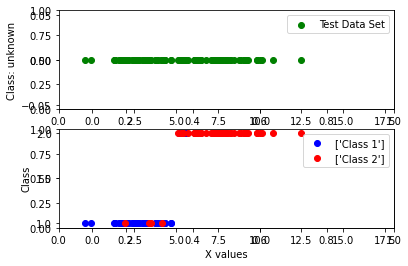

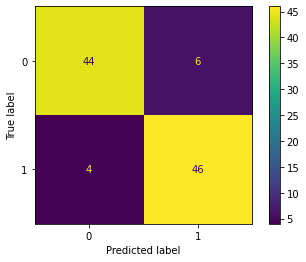

'Precision:'

array([0.91666667, 0.88461538])

'Recall:'

array([0.88, 0.92])

'FScore:'

array([0.89795918, 0.90196078])

'Support:'

array([50, 50])

'Cohen Kappa:'

0.8

In [18]:
# Se verifica: p(x|wi) P(wi) > p(x|wj) P(wj) y se asigna la clase al vector del data set de test

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, cohen_kappa_score


for i in range(ldt):
    
    if APost[i,0] > APost[i,1]:
        APost[i,2]=1
    else:
        APost[i,2]=2    

#display(APost)

# Visualización
# Graficar data set Test
fig, axs = plt.subplots(2,1)
axs=fig.add_subplot(2,1,1)
axs.scatter(Xtest,np.zeros(ldt) ,marker = 'o', c='green')
#plt.title("TEST Data set)
plt.xlim(-2,18)
axs.legend(['Test Data Set' ])
axs.set_xlabel('X values')
axs.set_ylabel('Class: unknown')

# Graficar Clasification data set 
axs=fig.add_subplot(2,1,2)
axs.scatter(Xtest[0:50], APost[0:50,2] ,marker = 'o', c='blue')
axs.scatter(Xtest[50:100], APost[50:100,2] ,marker = 'o', c='red')
#plt.title("Test Data set - Classification")
plt.xlim(-2,18)
axs.legend([['Class 1' ], ['Class 2']])
axs.set_xlabel('X values')
axs.set_ylabel('Class')
      
plt.show()

# Confusion Matrix

conf_mat=confusion_matrix(ytest, APost[:,2])
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()
plt.show()

# Métricas

preci, recal, fscor, suppo=precision_recall_fscore_support(ytest, APost[:,2])
cohkp=cohen_kappa_score(ytest, APost[:,2])

display('Precision:', preci, "Recall:", recal, "FScore:", fscor, "Support:", suppo, "Cohen Kappa:", cohkp)